# Hand written digit classification with Keras

MNIST is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.  

The digits have been isolated and the images have been scaled and centered. You can find more information about the MNIST dataset on the [MNIST official website](http://yann.lecun.com/exdb/mnist/).

In this tutorial, we are using deep learning library [Keras](http://www.keras.io/) to classify those hand-written digits. The available classes are `0 1 2 3 4 5 6 7 8 9`.

## Load dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(75)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Load the dataset

Keras has build-in functions for downloading some [well-known datasets](https://keras.io/datasets/).  
At the moment of writing, there are two text dataset and three image datasets supported by Keras.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

These are some of the training images 

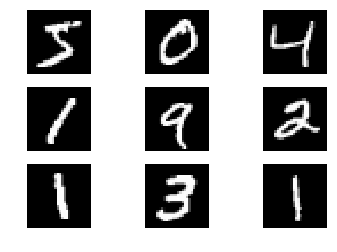

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis("off")

### Excercise 2.1 - Inspect the dataset
1. X_train, y_train, X_test and y_test are matrices. What are the dimensions of these matrices?
2. Can you explain where these numbers come from?
3. Inspect the content of X_train and y_train

*hint: use X_train.shape*

### (Exercise 2.2 - Python functions)
4.  Turn the code snippet for plotting into a function
```
def function(images, ncol=3)
    """Turns a list of matrices into a grid of heatmaps."""
```


## Design a deep neural network

Representation learning is at the hard of deep learning. Instead of crafting manual features, the network learns a representation of handwriting by itself. This representation is spread out over several layers. The final layer uses the patterns learned by the previous layers to classify the image into one of 10 available categories. The layered structure is typical for neural networks. The math can easily be expressed in terms of vectors, matrices, and higher order tensors. The networks can then be trained conveniently with a [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) algorithm. 

It is time now to design a neural network architecture capable of learning a representation of the above images. We create a model with three dense layers and a dropout layer after the first two layers. 

This example is copied from the [keras examples](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) repository, maintained by F. Chollet, the creator of Keras. In this repository you can find more working examples.

In [4]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

### Excercise 3.1 - Parameters
1. What are parameters?
1. How many parameters does each layer have?
2. How many parameters has the dropout function?
3. How many parameters has the model in total?
4. What is the advantage of having many parameters?
5. Can you see disadvantages of having many parameters?

### Excercise 3.2 - Activation functions
2. What is the role of an activation function?
3. What does the relu activation function do?
3. What other activation functions does Keras provide?
4. What happens is you leave out the activation functions in the hidden layers?

### Exercise 3.3 - Layers
1. What is the task of the first layer?
2. What is the task of the hidden layers?
3. What is the task of the final layer?

### (Exercise 3.4 - Keras source code)
Go to the github repository of Keras.
1. Locate the source code of the Sequential class
2. Read trough the code and try to understand how it works

## Train the neural network

Before we can train the model, we need to reshape and rescale the input. The re-shape is needed since keras expects one-dimensional input for dense layers. Without rescaling, the relu activation functions would be overstimulated, resulting in cell damage.

In [6]:
y_train.shape

(60000,)

In [7]:
def flatten(X):
    dim = X.shape
    return X.reshape(dim[0], dim[1]*dim[2])

In [8]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

X_train = flatten(x_train) / 255
X_test = flatten(x_test) / 255

In [9]:
batch_size = 128
nb_epoch = 2

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 126us/step - loss: 0.2615 - acc: 0.9214 - val_loss: 0.1215 - val_acc: 0.9624
Epoch 2/2
60000/60000 [==============================] - 7s 121us/step - loss: 0.1076 - acc: 0.9681 - val_loss: 0.0808 - val_acc: 0.9759


### Exercise 3.1 - Training phase
1. What does it mean to train a neural network?
2. Which ingredients do you need for training a neural network?

### Exercise 3.2 - Accuracy and Loss
Run the code below.
1. What is meant by loss?
2. What is meant by accuracy?

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.98


### Exercise 3.3 - Training and validation
1. What the difference between a training set and a validation set?
2. What is the difference between a test set and a validation set?

### Exercise 3.4 Make predictions
1. Run the code below to make predictions with the model that you have just trained
2. Try to find an example that is misclassified by the network

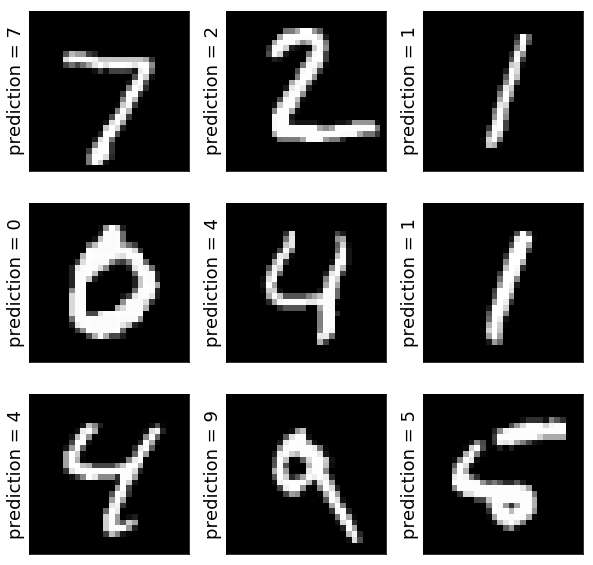

In [11]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % res[i], fontsize=18)

### Exercise 3.5 - Batches and Epochs
1. The batch size is set to 128. What does this mean?
2. The number of epochs is 2. What does that mean?
4. Try increasing the number of epochs

## 4. Modified architecture

### Exercise 4.1 - Architecture
Create and train several architectures and see how the training process and the performance of the network are influenced
1. Reduce the number of layers
2. Reduce the number of units
3. Add extra more layers
3. Add more units
2. Increase dropout
1. Decrease dropout

## 5. Convolutional networks

### (Exercise 5.1 - Convolutional networks)
Create and train a convolutional network on the MNIST dataset. You can find examples on the [keras examples repository](https://github.com/fchollet/keras/blob/master/examples/